In [107]:
#Begin the coding portion of the project, start by bringing in some useful libraries
from __future__ import print_function
from sklearn import metrics as mt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from ipywidgets import widgets as wd
from pandas.plotting import scatter_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

## Business Understanding 

In [2]:
#Bring in the data
df = pd.read_csv('/Users/dremaul/OneDrive/SMU/DS7331 COURSEWORK/Citywide_Payroll_Data__Fiscal_Year_.csv') # read in the csv file
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
df.info()

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923290 entries, 0 to 3923289
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int64(1), object(9)
memory usage: 508.8+ MB


## Data Meaning

## Data Quality

In [3]:
#Compute percentages of each columns missing data
percent_missing = df.isnull().sum()/len(df)
#Put percents into df 
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Sort it and show the results
missing_value_df.sort_values('percent_missing', inplace=True)


In [4]:
missing_value_df.round(5)

,column_name,percent_missing
Fiscal Year,Fiscal Year,0.00000
OT Hours,OT Hours,0.00000
Regular Gross Paid,Regular Gross Paid,0.00000
Regular Hours,Regular Hours,0.00000
Pay Basis,Pay Basis,0.00000
Base Salary,Base Salary,0.00000
Leave Status as of June 30,Leave Status as of June 30,0.00000
Total OT Paid,Total OT Paid,0.00000
Total Other Pay,Total Other Pay,0.00000
Agency Name,Agency Name,0.00000


In [5]:
# Drop the unnecessary columns
df2 = df[[
            'Fiscal Year',
            'OT Hours',
            'Regular Gross Paid',
            'Regular Hours',
            'Pay Basis',
            'Base Salary',
            'Leave Status as of June 30',
            'Total OT Paid',
            'Agency Name',
            'Agency Start Date',
            'Title Description',
            'Last Name',
            'First Name',
            'Total Other Pay',
            'Work Location Borough'
        ]]

# NAs are very few for these columns.  We will drop them.
def dropNa(array):
    result = df2.dropna(subset=array)
    return result

df2 = dropNa(['Agency Start Date', 'Title Description', 'Last Name', 'First Name', 'Work Location Borough'])

df2 = df2.replace('BROOKLYN', 'KINGS')
df2 = df2.replace('MANHATTAN', 'NEW YORK')

df2.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414938 entries, 0 to 3923289
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int64  
 1   OT Hours                    float64
 2   Regular Gross Paid          float64
 3   Regular Hours               float64
 4   Pay Basis                   object 
 5   Base Salary                 float64
 6   Leave Status as of June 30  object 
 7   Total OT Paid               float64
 8   Agency Name                 object 
 9   Agency Start Date           object 
 10  Title Description           object 
 11  Last Name                   object 
 12  First Name                  object 
 13  Total Other Pay             float64
 14  Work Location Borough       object 
dtypes: float64(6), int64(1), object(8)
memory usage: 416.9+ MB


In [6]:
#Compute percentages of each columns missing data
percentMissingDf2 = df2.isnull().sum()/len(df2)
#Put percents into df 
missingValueDf2 = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percentMissingDf2})
#Sort it and show the results
missingValueDf2.sort_values('percent_missing', inplace=True)

In [7]:
missingValueDf2.round(5)

,column_name,percent_missing
Fiscal Year,Fiscal Year,0.0
OT Hours,OT Hours,0.0
Regular Gross Paid,Regular Gross Paid,0.0
Regular Hours,Regular Hours,0.0
Pay Basis,Pay Basis,0.0
Base Salary,Base Salary,0.0
Leave Status as of June 30,Leave Status as of June 30,0.0
Total OT Paid,Total OT Paid,0.0
Agency Name,Agency Name,0.0
Agency Start Date,Agency Start Date,0.0


In [8]:
df2['Pay Basis'] == 'per Hour', ''
dfSample = df2.sample(100)
dfSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3273972 to 1439837
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year                 100 non-null    int64  
 1   OT Hours                    100 non-null    float64
 2   Regular Gross Paid          100 non-null    float64
 3   Regular Hours               100 non-null    float64
 4   Pay Basis                   100 non-null    object 
 5   Base Salary                 100 non-null    float64
 6   Leave Status as of June 30  100 non-null    object 
 7   Total OT Paid               100 non-null    float64
 8   Agency Name                 100 non-null    object 
 9   Agency Start Date           100 non-null    object 
 10  Title Description           100 non-null    object 
 11  Last Name                   100 non-null    object 
 12  First Name                  100 non-null    object 
 13  Total Other Pay          

## Simple Statistics

In [9]:
payroll_clean = df2[['Fiscal Year', 'Agency Name', 'Agency Start Date', 'Work Location Borough',
'Title Description', 'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
'Total Other Pay']]

payroll_clean = payroll_clean.drop_duplicates()
payroll_clean = payroll_clean.dropna()
payroll_clean.reset_index(drop=True, inplace=True)

,Fiscal Year,OT Hours,Regular Gross Paid,Regular Hours,Pay Basis,Base Salary,Leave Status as of June 30,Total OT Paid,Agency Name,Agency Start Date,Title Description,Last Name,First Name,Total Other Pay,Work Location Borough
0,2020,0.0,84698.21,1820.0,per Annum,86005.0,ACTIVE,0.0,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,EMERGENCY PREPAREDNESS MANAGER,BEREZIN,MIKHAIL,0.0,BROOKLYN
1,2020,0.0,84698.21,1820.0,per Annum,86005.0,ACTIVE,0.0,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,EMERGENCY PREPAREDNESS MANAGER,GEAGER,VERONICA,0.0,BROOKLYN
2,2020,0.0,84698.21,1820.0,per Annum,86005.0,ACTIVE,0.0,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,EMERGENCY PREPAREDNESS MANAGER,RAMANI,SHRADDHA,0.0,BROOKLYN
3,2020,0.0,84698.21,1820.0,per Annum,86005.0,ACTIVE,0.0,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,EMERGENCY PREPAREDNESS MANAGER,ROTTA,JONATHAN,0.0,BROOKLYN
4,2020,0.0,84698.21,1820.0,per Annum,86005.0,ACTIVE,0.0,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,EMERGENCY PREPAREDNESS MANAGER,WILSON II,ROBERT,0.0,BROOKLYN


In [10]:
df2['Fiscal Year'].apply(str)

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
3923285    2019
3923286    2019
3923287    2019
3923288    2019
3923289    2019
Name: Fiscal Year, Length: 3414938, dtype: object

In [11]:
df2Subset = df2[[
    'Base Salary',
    'OT Hours',
    'Regular Gross Paid',
    'Regular Hours',
    'Total OT Paid',
    'Total Other Pay'
]]
df2Subset.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Base Salary,OT Hours,Regular Gross Paid,Regular Hours,Total OT Paid,Total Other Pay
count,3414938.00,3414938.00,3414938.00,3414938.00,3414938.00,3414938.00
mean,43682.50,60.77,42335.76,663.86,3298.95,2544.94
std,42084.26,152.77,39708.30,884.07,9027.67,5655.70
min,0.01,-209.00,-76223.05,-1260.00,-26493.88,-281595.04
25%,33.18,0.00,3553.51,0.00,0.00,0.00
50%,42146.00,0.00,36234.91,0.00,0.00,0.25
75%,78026.00,1.00,74472.67,1820.00,166.05,2178.27
max,414707.00,3147.00,672308.86,4160.00,237389.73,650000.00


Notice that there are negative min values for most of our columns.  We will look closer at these values to see if they can possibly be removed. Too many negative values will affect our ability to forecast salary unless we discover a valid reason for having negative values.

In [106]:
# df2Negative = pd.DataFrame({
#     'OT Hours': df2[(df2['OT Hours'] < 0)]['OT Hours'].count(),
#     'Regular Gross Paid': df2[(df2['Regular Gross Paid'] < 0)]['Regular Gross Paid'].count(),
#     'Regular Hours': df2[(df2['Regular Hours'] < 0)]['Regular Hours'].count(),
#     'Base Salary': df2[(df2['Base Salary'] < 0)]['Base Salary'].count(),
#     'Total OT Paid': df2[(df2['Total OT Paid'] < 0)]['Total OT Paid'].count()
# }, index=[0])

pd.DataFrame({
    'Metric': ['OT HOurs', 'Regular Gross Paid', 'Regular Hours', 'Base Salary', 'Total OT Paid', 'Total Other Pay'],
    'Count': [df2[(df2['OT Hours'] < 0)]['OT Hours'].count(),
              df2[(df2['Regular Gross Paid'] < 0)]['Regular Gross Paid'].count(),
              df2[(df2['Regular Hours'] < 0)]['Regular Hours'].count(),
              df2[(df2['Base Salary'] < 0)]['Base Salary'].count(),
              df2[(df2['Total OT Paid'] < 0)]['Total OT Paid'].count(),
              df2[(df2['Total Other Pay'] < 0)]['Total Other Pay'].count()
             ]
})

,Metric,Count
0,OT HOurs,148
1,Regular Gross Paid,3563
2,Regular Hours,1108
3,Base Salary,0
4,Total OT Paid,1298
5,Total Other Pay,22853


A count of the negative values reveals that there are not enough to effect anything if we remove them.  Our dataset contains more than 3 million records.  We will only remove around 6000.

In [13]:
df2Gte0 = df2[
    (df2['OT Hours'] >= 0) &
    (df2['Regular Gross Paid'] >= 0) &
    (df2['Regular Hours'] >= 0) &
    (df2['Base Salary'] >= 0) &
    (df2['Total OT Paid'] >= 0) &
    (df2['Total Other Pay'] >= 0)
]
df2Gte0['Fiscal Year'].apply(str)
df2Gte0.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Fiscal Year,OT Hours,Regular Gross Paid,Regular Hours,Base Salary,Total OT Paid,Total Other Pay
count,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00
mean,2017.52,60.67,42268.29,662.58,43486.68,3288.05,2617.69
std,1.72,152.78,39695.58,883.32,42098.10,9017.95,5445.57
min,2014.00,0.00,0.00,0.00,0.01,0.00,0.00
25%,2016.00,0.00,3547.30,0.00,33.18,0.00,0.00
50%,2018.00,0.00,36123.88,0.00,41992.00,0.00,0.36
75%,2019.00,1.00,74365.21,1820.00,78026.00,158.00,2237.34
max,2020.00,3147.00,672308.86,4160.00,414707.00,237389.73,650000.00


After removing the negative values, it is interesting to see that the minimum values for Regler Gross Paid, Base Salary, and Regular Hours are zero.  It appears that there are people listed as employees who either voluneer, or don't show up for work. It is more likely that there are employees that were hired, did not show up for work and were terminated.

In [14]:
df3 = df2Gte0
df3BaseSalary = df3[['Base Salary', 'Pay Basis']]
df3BaseSalary.groupby(['Pay Basis']).describe().apply(lambda s: s.apply('{0:.2f}'.format))

Base Salary                                                   \
                      count      mean       std      min       25%       50%   
Pay Basis                                                                      
Prorated Annual    15573.00  32693.99  15475.38  2282.00  24168.00  31298.00   
per Annum        2014002.00  72657.23  29136.16     1.00  47670.00  71764.00   
per Day           753923.00     81.08     96.85     0.01     33.18     33.18   
per Hour          603833.00    665.23   8776.45     0.50      1.00     13.37   

                                      
                      75%        max  
Pay Basis                             
Prorated Annual  37413.00  165090.00  
per Annum        90432.00  414707.00  
per Day            110.29     999.90  
per Hour            15.97  160683.39

The high variation in base salary will make it difficult for our model to perdict. As we look closer at base salary, we noticed that it includes all classes of Pay Basis.  That is why we are displaying it separately to show the statistics for the different classes of Pay Basis. Again, the minimum values of zero are interesting. Let's see how many employees (likely volunteers) are earning zero dollars.

### Employees Earning Zero Dollars

In [15]:
pd.DataFrame({
    'Metric': ['Base Salary', 'Regular Gross Paid', 'Regular Hours'],
    'Count': [df3[(df3['Base Salary'] < 1)]['First Name'].count(),
              df3[(df3['Regular Gross Paid'] < 1)]['First Name'].count(),
              df3[(df3['Regular Hours'] < 1)]['First Name'].count()
             ]
})


,Metric,Count
0,Base Salary,3
1,Regular Gross Paid,63809
2,Regular Hours,1935881


There are very few emplyees with a salary or gross pay of 0 compared to the entire data set.  The fact that we have a large number of employees with 0 hours worked is interesting. We will take a closer look at that.

### Count of Employees with Zero Hours Worked by Pay Basis

In [16]:
df3[(df3['Regular Hours'] < 1)].groupby(['Pay Basis'])['First Name'].count()

Pay Basis
Prorated Annual      1267
per Annum          876330
per Day            666166
per Hour           392118
Name: First Name, dtype: int64

This is the count of employees with zero hours broken down by Pay Basis.  Employees who are paid per day, and annually would have likely shown zero hours because they are not paid by the hour, thus hours worked would not be tracked.  The employees who get paid by the hour but show zero hours worked might throw off our model when we try to predict.  The model might put all these in the same category but taking Pay Basis into consideration should remedy this situation.

### High Hourly Pay

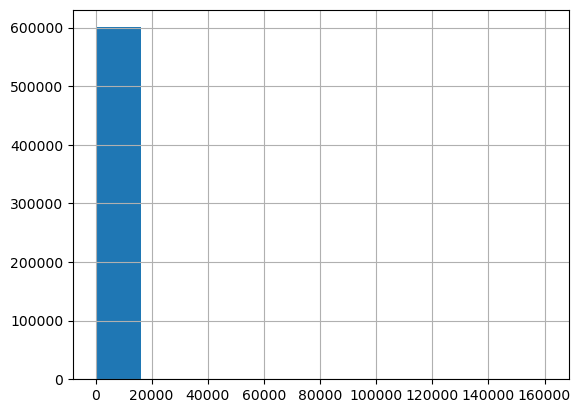

In [17]:
df3[(df3['Pay Basis'] == 'per Hour')]['Base Salary'].hist()
plt.show()

Clearly we have some outliers when we look at he combined histogram of all employees who are paid by the hour.

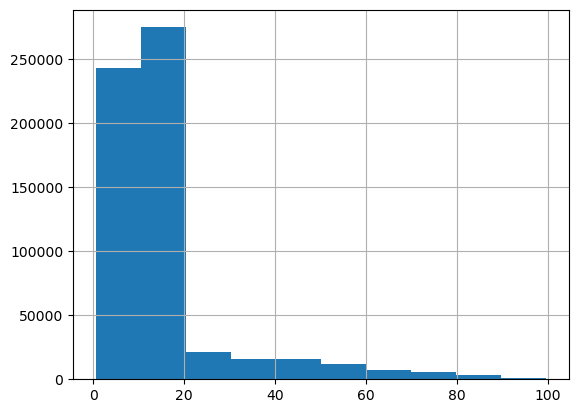

In [18]:
df3[(df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] < 100)]['Base Salary'].hist()
plt.show()

This is a histogram of employees who make less than 100 dollars per hour, which is a more common scenario.  Salary data is usually right skewed, and here the result is what we expect to see.

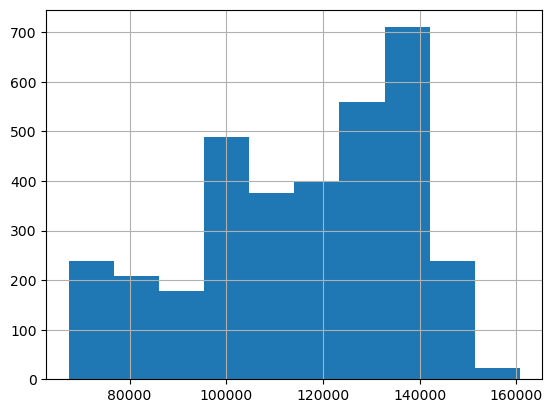

In [19]:
df3[(df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] > 500)]['Base Salary'].hist()
plt.show()

In [20]:

# df3[(df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] > 500)][['Base Salary', 'Regular Hours']].describe()

,Base Salary,Regular Hours
count,3417.000000,3417.0
mean,115089.705891,0.0
std,21076.331384,0.0
min,67440.900000,0.0
25%,101995.670000,0.0
50%,118559.800000,0.0
75%,133863.680000,0.0
max,160683.390000,0.0


What is interesting here is the extremely high hourly rate for the employees making more than 500 dollars per hour in the histogram. But notice in the table that all these employees have zero hours worked.  It could be that the Pay Basis for this subset should be in the 'per Annum' class. We might move this subset to that class and perform some calculations to convert the hourly rate to an annual rate and place that into a new column named AnnualSalary.

In [21]:
df3.groupby(['Pay Basis'])['First Name'].count()

Pay Basis
Prorated Annual      15573
per Annum          2014002
per Day             753923
per Hour            603833
Name: First Name, dtype: int64

In [62]:
df4 = df3
# df3[df3['Pay Basis'] == 'per Hour'].describe().apply(lambda s: s.apply('{0:.2f}'.format))
# df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] < 5)]['Base Salary'].count()
# df3[(df3['Fiscal Year'] < 2015)].count()
# Here we convert per hour where the base salary looks like it should be an annual figure
# df4['AnnualSalary'] = df4[((df4['Pay Basis'] == 'per Hour') &
#                          (df4['Base Salary'] > 500) |
#                          (df4['Base Salary'] > 20000))
#                         ]['Base Salary']

# Here we just convert per hour to an annual figure based on the number of hours worked.
# df4['AnnualSalary'] = df4[(df4['Pay Basis'] == 'per Hour') &
#                          (df4['Base Salary'] < 500)
#                         ]['Base Salary'] * df4['Regular Hours']

# Here we convert pay basis 'per Day' to Annual Salary
# df4['AnnualSalary'] = (df4[(df4['Pay Basis'] == 'per Day')]['Base Salary'] / 8) * df4['Regular Hours']

# df4['AnnualSalary'] = df4[(df4['Pay Basis'] == 'per Annum') | (df4['Pay Basis'] == 'Prorated Annual')]['Base Salary']

In [23]:
# if ((df4['Pay Basis'] == 'per Hour') & (df4['Base Salary'] > 500)) | (df4['Base Salary'] > 20000):
#     df4['Base Salary']

In [25]:
# df4[['Base Salary', 'Regular Hours', 'AnnualSalary']].describe()

In [46]:
df4.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Fiscal Year,OT Hours,Regular Gross Paid,Regular Hours,Base Salary,Total OT Paid,Total Other Pay
count,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00,3387331.00
mean,2017.52,60.67,42268.29,662.58,43486.68,3288.05,2617.69
std,1.72,152.78,39695.58,883.32,42098.10,9017.95,5445.57
min,2014.00,0.00,0.00,0.00,0.01,0.00,0.00
25%,2016.00,0.00,3547.30,0.00,33.18,0.00,0.00
50%,2018.00,0.00,36123.88,0.00,41992.00,0.00,0.36
75%,2019.00,1.00,74365.21,1820.00,78026.00,158.00,2237.34
max,2020.00,3147.00,672308.86,4160.00,414707.00,237389.73,650000.00


In [27]:
# Top 10 median salary by pay basis
# df3 = df2.groupby(by=['Agency Name']).median(['Regular Gross Paid'])
# df3 = df3.sort_values(['Regular Gross Paid']).head(10)
# # df3.head(10)
# df3.plot(kind='barh', figsize=(20,50), color='g', fontsize=20)
# plt.show()

In [28]:
#df3 = df2[df2['Pay Basis'] == 'per Hour', 'AnnualSalary'] = df2.['Base Salary'] * 2080
# df3 = df2[df2['Pay Basis'] == 'per Hour', 'AnnualSalary'] = df2['Base Salary'] * 2080
# df3 = dfSample
# df3['AnnualSalary'] = df3['Pay Basis'].apply(lambda x: df3['Base Salary']*2080 if x == 'per Hour' else df3['Base Salary'])
# df3.head()
# df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

In [29]:
# df3 = df2.groupby(by=['Pay Basis']).median(['Regular Gross Paid'])
# df3['Regular Gross Paid']

In [30]:
# df2[(df2['Agency Name']=='DOE CUSTODIAL PAYROL')].describe().apply(lambda s: s.apply('{0:.2f}'.format))

## Visualize Attributes

### Top 10 Salaries by Abency and Pay Basis

In [33]:
# Pay Basis 'per Annum', 'per Day', 'per Hour', 'Prorated Annual'
def topPaidAgency(basis):
    dfBar = df3[df3['Pay Basis'] == basis]
    dfBar = pd.DataFrame({'Agency': dfBar['Agency Name'],
                        'Gross': dfBar['Regular Gross Paid'],
                        'Base': dfBar['Base Salary']
                       })
    # df3 = df3.groupby(by=['Agency']).mean()['Base']
    dfBar = dfBar.groupby(['Agency']).median()['Base']
    dfBar.head(10).sort_values().plot(kind='barh', figsize=(5,5), color='g')
    plt.show()

wd.interactive(topPaidAgency, basis=['per Annum', 'per Day', 'per Hour', 'Prorated Annual'])

interactive(children=(Dropdown(description='basis', options=('per Annum', 'per Day', 'per Hour', 'Prorated Ann…

### Top 10 Salaries by Job Title and Pay Basis

In [34]:
# Pay Basis 'per Annum', 'per Day', 'per Hour', 'Prorated Annual'
def topPaidTitle(basis):
    dfBarTitle = df3[df3['Pay Basis'] == basis]
    dfBarTitle = pd.DataFrame({'Title': dfBarTitle['Title Description'],
                        'Gross': dfBarTitle['Regular Gross Paid'],
                        'Base': dfBarTitle['Base Salary']
                       })
    # df3 = df3.groupby(by=['Agency']).mean()['Base']
    dfBarTitle = dfBarTitle.groupby(['Title']).median()['Base']
    dfBarTitle.head(10).sort_values().plot(kind='barh', figsize=(8,5), color='g')
    plt.show()

wd.interactive(topPaidTitle, basis=['per Annum', 'per Day', 'per Hour', 'Prorated Annual'])

interactive(children=(Dropdown(description='basis', options=('per Annum', 'per Day', 'per Hour', 'Prorated Ann…

### Change in Base Salary Over Time

In [86]:
df5 = pd.DataFrame({
    'Year': ['2015', '2016', '2017', '2018', '2019', '2020',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020',
             '2014', '2015', '2016', '2017', '2018', '2019', '2020'
            ],
    'MedianBase': [
        df3[(df3['Fiscal Year'] > 2014) & (df3['Fiscal Year'] < 2016) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2015) & (df3['Fiscal Year'] < 2017) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2016) & (df3['Fiscal Year'] < 2018) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2017) & (df3['Fiscal Year'] < 2019) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2018) & (df3['Fiscal Year'] < 2020) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2019) & (df3['Fiscal Year'] < 2021) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2014) & (df3['Fiscal Year'] < 2016) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2015) & (df3['Fiscal Year'] < 2017) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2016) & (df3['Fiscal Year'] < 2018) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2017) & (df3['Fiscal Year'] < 2019) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2018) & (df3['Fiscal Year'] < 2020) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2019) & (df3['Fiscal Year'] < 2021) & (df3['Pay Basis'] == 'per Annum')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2014) & (df3['Fiscal Year'] < 2016) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2015) & (df3['Fiscal Year'] < 2017) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2016) & (df3['Fiscal Year'] < 2018) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2017) & (df3['Fiscal Year'] < 2019) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2018) & (df3['Fiscal Year'] < 2020) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2019) & (df3['Fiscal Year'] < 2021) & (df3['Pay Basis'] == 'per Day')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2014) & (df3['Fiscal Year'] < 2016) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2015) & (df3['Fiscal Year'] < 2017) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2016) & (df3['Fiscal Year'] < 2018) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2017) & (df3['Fiscal Year'] < 2019) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2018) & (df3['Fiscal Year'] < 2020) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median(),
        df3[(df3['Fiscal Year'] > 2019) & (df3['Fiscal Year'] < 2021) & (df3['Pay Basis'] == 'Prorated Annual')]['Base Salary'].median()
    ],
    'Pay Basis': ['per Hour', 'per Hour', 'per Hour', 'per Hour', 'per Hour', 'per Hour',
                  'per Annum', 'per Annum', 'per Annum', 'per Annum', 'per Annum', 'per Annum', 'per Annum',
                  'per Day', 'per Day', 'per Day', 'per Day', 'per Day', 'per Day', 'per Day',
                  'Prorated Annual', 'Prorated Annual', 'Prorated Annual', 'Prorated Annual', 'Prorated Annual', 'Prorated Annual', 'Prorated Annual'
                 ]
})

In [85]:
def setBasis(basis):
    chart2 = alt.Chart(df5[df5['Pay Basis'] == basis])
    selection = alt.selection_multi(fields=['Pay Basis'], bind='legend')
    data = chart2.mark_line().encode(
        x='Year',
        y=alt.Y('MedianBase', title='Base Salary'),
        color='Pay Basis',
        opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).properties(
        width=600,
        height=600
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=20
    ).configure_legend(
        labelFontSize=20,
        titleFontSize=20,
        symbolSize=600,
        symbolStrokeWidth=4
    ).add_selection(
        selection
    )
    data.display()
wd.interactive(setBasis, basis=['per Annum', 'per Day', 'per Hour', 'Prorated Annual'])


interactive(children=(Dropdown(description='basis', options=('per Annum', 'per Day', 'per Hour', 'Prorated Ann…

In [82]:
df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] == 1)]['Base Salary'].count()
# df3[(df3['Fiscal Year'] < 2015) & (df3['Pay Basis'] == 'per Hour')]['Base Salary'].count()

133

This set of line charts shows salaries increasing / decreasing over time based on Pay Basis. Select the pay basis from the dropdown to see the trend.

Per Hour
The number of observations for the 2014 fiscal year for the Per Hour pay basis is 168. Additionally, 133 of those observed show to have a pay rate of 1 dollar an hour. Therefore, 2014 is excluded from this visual for the pay basis of 'per Hour'. There is significant increase from 2015 to 2020.

### Employees with the Highest Hourly Pay

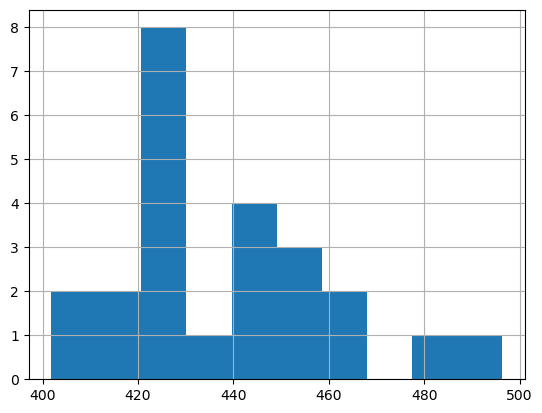

In [93]:
df3[(df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] > 400) & (df3['Base Salary'] < 500)]['Base Salary'].hist()
plt.show()

This is not a mistake. There are employees who earn between 400 and 500 per hour.  There are very few and they all work in the Civil Service Commision.  The implcations are that a classification model should easily identify the Agency Name but will have trouble with accurately identifying the title description.  For this entire data set, we should look at median salaries.  Any interpretations or conclusions based on the mean would be suspect.

In [96]:
df3[(df3['Pay Basis'] == 'per Hour') & (df3['Base Salary'] > 400) & (df3['Base Salary'] < 500)][['Agency Name', 'Title Description', 'Base Salary']].head()

,Agency Name,Title Description,Base Salary
126778,CIVIL SERVICE COMMISSION,COMMISSIONER,455.70
126780,CIVIL SERVICE COMMISSION,CHAIRMAN,496.31
126782,CIVIL SERVICE COMMISSION,COMMISSIONER,455.70
126783,CIVIL SERVICE COMMISSION,COMMISSIONER,455.70
705918,CIVIL SERVICE COMMISSION,CHAIRMAN,448.55


We included this table to show that the employees with the highest hourly pay are all from the same agency.

## Explore Joint Attributes

In [104]:
def setBasisScatter(basis):
    scatter_matrix(df3[df3['Pay Basis'] == basis].sample(30000), figsize=(15, 10))
    plt.show()
wd.interactive(setBasisScatter, basis=['per Annum', 'per Day', 'per Hour', 'Prorated Annual'])

interactive(children=(Dropdown(description='basis', options=('per Annum', 'per Day', 'per Hour', 'Prorated Ann…

We ran a scatter matrix on a random sample of 30000 observations from the data set to reduce processing time.  Select the Pay Basis from the dropdown to see the scatter matrix associated with pay basis being discussed.

#### Per Annum (Annual)
Over Time Hours is strongly corelated with Total Overtime Paid, with a positive correlation. But there is a weak correlation between OT Hours and 

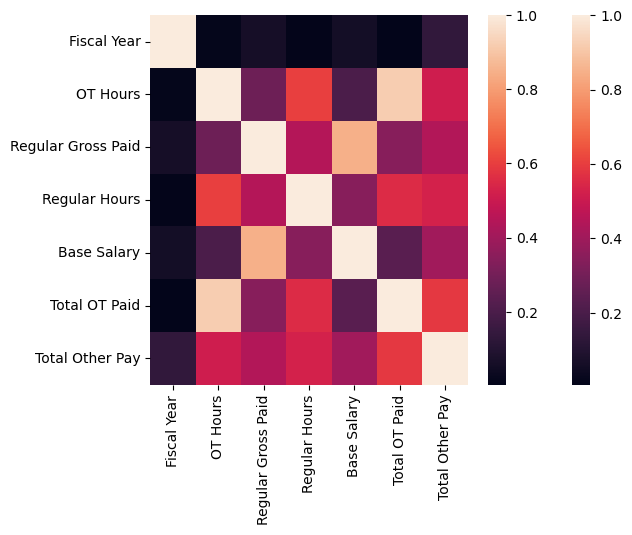

In [103]:
sns.heatmap(df3.sample(30000).corr());
plt.show()

## Explore Joint Attributes and Class

## New Features

## Exceptional Work